In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.io as pio
import plotly.express as px
pio.renderers
pio.renderers.default = "notebook_connected"

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, balanced_accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, f1_score, silhouette_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, VotingRegressor, BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [4]:
hc_eda = pd.read_csv('./cleaned_hatecrime.csv')
hc_eda

,Unnamed: 0,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,label
0,5411,CA00-0000015217,2004,2,Alameda,Alameda Co. Sheriff's Department,2,2,Unknown,0,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Daubing of swastika,4.0
1,5412,CA00-0000015122,2004,3,Alameda,Alameda,1,1,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Asian,Race/Ethnicity/Ancestry,Person,None,Threatening letters/flyers/email,4.0
2,5413,CA00-0000015123,2004,3,Alameda,Alameda,1,1,White,1,Simple Assault,Violent Crimes,Service/Gas Station,Anti-Arab,Race/Ethnicity/Ancestry,Person,"Other ( bottle, rocks, spitting)",Verbal slurs,4.0
3,5414,CA00-0000015356,2004,5,Alameda,Alameda,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Church/Synagogue/Temple,Anti-Catholic,Religion,Religious,None,Graffiti,4.0
4,5415,CA00-0000016280,2004,8,Alameda,Alameda,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Church/Synagogue/Temple,Anti-Catholic,Religion,Religious,None,Graffiti,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19020,24431,CA00-0000035217,2020,8,San Bernardino,San Bernardino,2,2,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Parking Lot/Garage,Anti-White,Race/Ethnicity/Ancestry,Person,"Other ( bottle, rocks, spitting)",Threatening letters/flyers/email,0.0
19021,24432,CA00-0000035224,2020,9,Sonoma,Santa Rosa,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Convenience Store,Anti-Jewish,Religion,Business,None,Graffiti,2.0
19022,24433,CA00-0000035226,2020,5,Sacramento,Sacramento,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Other/Unknown,Anti-Black or African American,Race/Ethnicity/Ancestry,Business,None,Other,2.0
19023,24434,CA00-0000035227,2020,12,Los Angeles,Santa Monica,1,0,Black or African American,1,Destruction/Damage/Vandalism,Property Crimes,Restaurant,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Business,"Other ( bottle, rocks, spitting)",Rock throwing,2.0


In [5]:
hc_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19025 entries, 0 to 19024
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      19025 non-null  int64 
 1   RecordId                        19025 non-null  object
 2   ClosedYear                      19025 non-null  int64 
 3   MonthOccurrence                 19025 non-null  int64 
 4   County                          19025 non-null  object
 5   NCIC                            19025 non-null  object
 6   TotalNumberOfVictims            19025 non-null  int64 
 7   TotalNumberOfIndividualVictims  19025 non-null  int64 
 8   SuspectsRaceAsAGroup            19025 non-null  object
 9   TotalNumberOfSuspects           19025 non-null  int64 
 10  MostSeriousUcr                  19025 non-null  object
 11  MostSeriousUcrType              19025 non-null  object
 12  MostSeriousLocation             19025 non-null

<AxesSubplot:xlabel='TotalNumberOfSuspects', ylabel='TotalNumberOfVictims'>

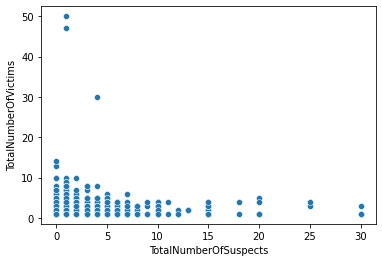

In [7]:
sns.scatterplot(data=hc_eda, y='TotalNumberOfVictims', x='TotalNumberOfSuspects')